1. Brief Description : 
    
An F- test for overall regression assesses whether a linear regression model provides a better fit to the data than a model with no predictors. The null hypothesis is that all regression coefficients except the intercept are zero indicating no linear realationship. The alternative hypothesis says that at least one predictor has a significant effect. 
    
The equation for the test statistic is : F = Explained Variance ( MSR) / Unexplained Variance ( MSE)  = (SSR/k) / (SSE/(n-k-1)). Where SSR is regression sum of squares, SSE is error sum of squares, k is the number of predictors and n is the sample size. 
The decision rule is that you reject the null hypothesis if F>F critical which is a value  available from the distribution tables or if p-value is less than alpha. 

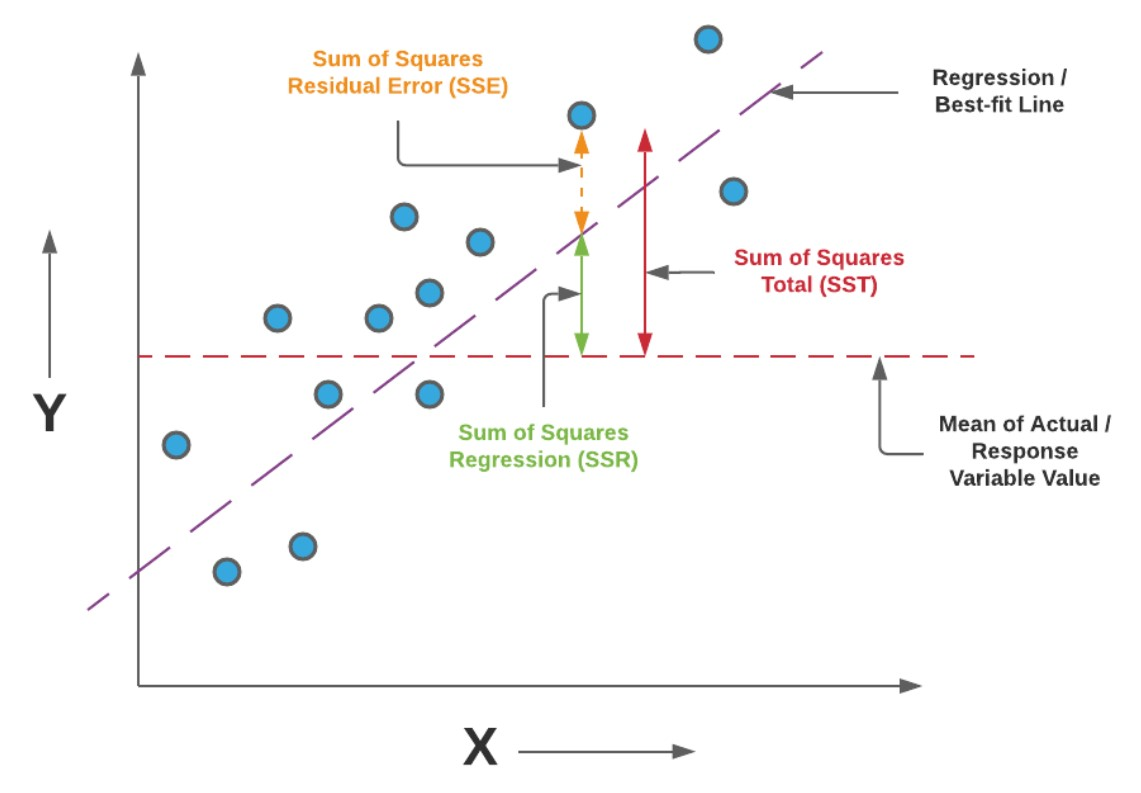

3. Situation :     3. A situation where someone might want to use an F-test is to determine whether a set of predictors like clinical, genetic or lifestyle factors collectively influences a health related outcome. Specifically, a researcher studying risk factors for hypertension might fit a regression model with predictors like age, BMI, sodium intake, smoking status and genetic markers in an effort to predict systolic blood pressure. They would conduct an F-test to confirm whether the model as a whole explains a significant portion of blood pressure variation compared to the null model that has no predictors. If the F-test is significant it suggest that at least one of these variables is meaningfully associated with hypertension and would justify further investigation. 


In [8]:
import numpy as np
from scipy.stats import f

def ftest(y_true, y_pred, n_predictors):
    '''
    Perform an F-test for overall significance of regression.
    '''
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    n_obs = len(y_true)
    
    # Sums of squares
    ssr = np.sum((y_pred - np.mean(y_true))**2)  # Regression SS
    sse = np.sum((y_true - y_pred)**2)          # Error SS
    
    # Degrees of freedom
    df_reg = n_predictors
    df_resid = n_obs - n_predictors - 1
    
    # F-statistic and p-value
    f_stat = (ssr / df_reg) / (sse / df_resid)
    p_value = f.sf(f_stat, df_reg, df_resid)
    
    return f_stat, p_value

import numpy as np
# from BIOM480Tests import ftest  couldn't get this to work

# Simulate data: y = 2*X1 + 3*X2 + noise
np.random.seed(42)
n_obs = 100
X1 = np.random.randn(n_obs)
X2 = np.random.randn(n_obs)
y_true = 2*X1 + 3*X2 + np.random.randn(n_obs) * 0.5  # True relationship with noise

# Simulate predictions from a fitted regression model
y_pred = 2.1*X1 + 2.9*X2  # Close to true coefficients

# Run F-test (2 predictors)
f_stat, p_value = ftest(y_true, y_pred, n_predictors=2)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# More real world example: 

# Simulate data with weaker signal and more noise
np.random.seed(42)
X = np.random.randn(100, 2)
y_true = 0.5*X[:, 0] + 0.8*X[:, 1] + np.random.randn(100) * 2  # Weaker coefficients + more noise
y_pred = 0.6*X[:, 0] + 0.7*X[:, 1]  # Imperfect model predictions

# Run test
f_stat, p_value = ftest_regression(y_true, y_pred, n_predictors=2)
print(f"F-statistic ex 2: {f_stat:.4f},  p-value ex 2: {p_value:.4e}")

F-statistic: 1629.7610
P-value: 2.2531e-75
F-statistic ex 2: 8.3694,  p-value ex 2: 4.4346e-04
